In [100]:
import drdf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_drdf(fname):
  reader = drdf.DRDF()
  reader.read(fname)
  events = []
  for run in reader.runs:
    for event in reader.runs[run]:
      hits_map = dict()
      for cam, img in reader.runs[run][event].items():
        amplitude = img.pixels[:, :, 0] 
        time = img.pixels[:, :, 1]
        hits_map[cam] = amplitude
      events.append((event, hits_map))
  return events

file = load_drdf("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/response.drdf")

In [101]:
def CamList():
    cam_list = []
    for cam in file[0][1]:
        #if np.any(event_i[cam] != 0.):
        cam_list.append(cam)
    return cam_list

cam_list = CamList()

In [4]:
def AllImages(): 
    all_images = []
    for i in range(len(file)):
        ph_matrix = []
        for cam in cam_list:
            ph_matrix.append(file[i][1][cam])
        all_images.append(ph_matrix)
    return all_images
    print(len(all_images[0]))

all_images = AllImages()
#print((all_images[0][0]))

In [5]:
def PlotCamsImages():
    for i in range(len(all_images)):
        #for cam in cam_list:
        for j in range(len(all_images[i])):
            plt.imshow(all_images[i][j], interpolation='none')
            plt.colorbar()
            plt.title(f"event {file[i][0]} on {cam_list[j]}")
            plt.show()
            break
        break

#PlotCamsImages()

NORMALIZATION

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [66]:
def findMax():
    matrices_1d = []
    all_single_photons = []
    for i in range(len(all_images)):
            for j in range(len(all_images[0])):
                    matrices_1d = all_images[i][j].flatten()
                    for k in range(len(matrices_1d)):
                            #print(len(matrices_1d))
                            all_single_photons.append(matrices_1d[k])
    max_photon = np.max(all_single_photons)
    return max_photon

max_photon = findMax()

In [99]:
normalized_ph = all_single_photons/max_photon

Creo una lista di 54000 matrici 31x31 dalla lista di tutti i fotoni (all_single_photons)

In [91]:
num_matrices = len(all_images)*len(all_images[0])
dim_matrix = len(all_images[0][0])

# Crea la lista di matrici
all_images_normalized_1d = []
index = 0
for _ in range(num_matrices):
    matrix = np.array(normalized_ph[index:index + dim_matrix * dim_matrix]).reshape((dim_matrix, dim_matrix))
    all_images_normalized_1d.append(matrix)
    index += dim_matrix * dim_matrix


In [14]:
#for i in all_single_photons:
#plt.hist(all_single_photons)
#plt.show()

# total_sum = sum(all_single_photons)
# partial_sum = sum([x for x in all_single_photons if x > 1000])
# partial_sum/total_sum

0.023515681969078803

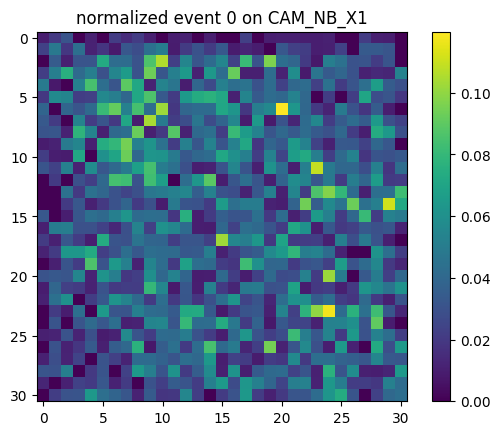

In [19]:
plt.imshow(normalized_matrix, interpolation='none')
plt.colorbar()
plt.title(f"normalized event {file[0][0]} on {cam_list[0]}")
plt.show()

ROOT

In [20]:
import ROOT as root

#sensor1.root è il file; ogni camera è un TTree
input_file = root.TFile.Open("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/sensors.root", "READ")
tree = input_file.Get("CAM_NB_X1")
entries = tree.GetEntries()

cam_list = CamList()

nr_photons_list_all_cams_list = []
for cam in cam_list:
    nr_photons_list = []
    tree = input_file.Get(cam)
    for i in range(entries):
        n = tree.GetEntry(i)
        inner_photons = tree.innerPhotons
        #if inner_photons: 
        nr_photons_list.append(inner_photons)
    #print(nr_photons_list)
    nr_photons_list_all_cams_list.append(nr_photons_list)

nr_photons_list_all_cams = np.array(nr_photons_list_all_cams_list)#ho creato una matrice 10.000 colonne (nr eventi) x 76 righe (nr camere). I numeri che vediamo sono i numeri di fotoni che arrivano alla camera


Welcome to JupyROOT 6.28/04


In [21]:
ev_list_tot = list(range(0,1000))

In [22]:
def column(matrix, i):
    column = [row[i] for row in matrix]
    return column

all_photons_in_ev = []
for i in ev_list_tot:
    nr_photons_in_ev = column(nr_photons_list_all_cams, i)#lista di fotoni in un determinato evento/sono le colonne delle matrici
    all_photons_in_ev.append(nr_photons_in_ev)#faccio una lista di queste liste di fotoni
#print(all_photons_in_ev)

# root_ev = dict(zip(ev_list, all_photons_in_ev))

final_root_data = []
for i in range(len(all_photons_in_ev)):
    nr_photon_in_cam = []
    for j in range(len(all_photons_in_ev[i])):
        nr_photon_in_cam.append(all_photons_in_ev[i][j])
    dict_cam_ev = dict(zip(cam_list, nr_photon_in_cam))
    final_root_data.append((ev_list_tot[i], dict_cam_ev))
#print(final_root_data)

[(0, {'CAM_NB_X1': 0, 'CAM_NB_X2': 0, 'CAM_NB_X3': 0, 'CAM_NB_X4': 0, 'CAM_NB_X5': 0, 'CAM_NB_X6': 0, 'CAM_NB_X7': 0, 'CAM_NB_X8': 0, 'CAM_NN_Y0': 0, 'CAM_NN_Y1': 100, 'CAM_NN_Y10': 0, 'CAM_NN_Y11': 0, 'CAM_NN_Y12': 0, 'CAM_NN_Y13': 301, 'CAM_NN_Y14': 0, 'CAM_NN_Y15': 0, 'CAM_NN_Y16': 337, 'CAM_NN_Y17': 0, 'CAM_NN_Y18': 0, 'CAM_NN_Y2': 0, 'CAM_NN_Y3': 0, 'CAM_NN_Y4': 0, 'CAM_NN_Y5': 0, 'CAM_NN_Y6': 0, 'CAM_NN_Y7': 0, 'CAM_NN_Y8': 0, 'CAM_NN_Y9': 0, 'CAM_NS_Y0': 0, 'CAM_NS_Y1': 0, 'CAM_NS_Y10': 0, 'CAM_NS_Y11': 0, 'CAM_NS_Y12': 0, 'CAM_NS_Y13': 0, 'CAM_NS_Y14': 0, 'CAM_NS_Y15': 0, 'CAM_NS_Y16': 0, 'CAM_NS_Y17': 0, 'CAM_NS_Y18': 0, 'CAM_NS_Y2': 0, 'CAM_NS_Y3': 0, 'CAM_NS_Y4': 0, 'CAM_NS_Y5': 0, 'CAM_NS_Y6': 0, 'CAM_NS_Y7': 0, 'CAM_NS_Y8': 0, 'CAM_NS_Y9': 0, 'CAM_NT_X1': 0, 'CAM_NT_X2': 0, 'CAM_NT_X3': 0, 'CAM_NT_X4': 0, 'CAM_NT_X5': 0, 'CAM_NT_X6': 0, 'CAM_NT_X7': 0, 'CAM_NT_X8': 0}), (1, {'CAM_NB_X1': 0, 'CAM_NB_X2': 0, 'CAM_NB_X3': 0, 'CAM_NB_X4': 0, 'CAM_NB_X5': 0, 'CAM_NB_X6': 0, 'CA

In [24]:
ev_cam_state = []
dict_with_cam_state = final_root_data
for i in range(len(final_root_data)):
    for cam in cam_list:
        if 0 < final_root_data[i][1][cam] <= 5:
            dict_with_cam_state[i][1][cam] = 0
        if final_root_data[i][1][cam] > 5:
            dict_with_cam_state[i][1][cam] = 1
        ev_cam_state.append(dict_with_cam_state[i][1][cam])

54000


CNN MODEL

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [150]:
# train_ds, val_ds, train_labels, val_labels = train_test_split(all_images_normalized_1d, ev_cam_state, train_size=0.8, random_state=42)

# train_ds = np.array(train_ds)
# val_ds = np.asarray(val_ds)
# train_labels = np.asarray(train_labels) 
# val_labels = np.asarray(val_labels)

train_ds, test_ds, train_labels, test_labels = train_test_split(all_images_normalized_1d, ev_cam_state, train_size=0.8, random_state=42)

train_ds = np.array(train_ds)
test_ds = np.asarray(test_ds)
train_labels = np.asarray(train_labels) 
test_labels = np.asarray(test_labels)

In [151]:
input_shape = [32,31,31,1]

train_ds = train_ds.reshape(int(0.8*len(all_images_normalized_1d)),31,31, 1)
test_ds = test_ds.reshape(int(0.2*len(ev_cam_state)), 31, 31, 1)

In [152]:
model = models.Sequential()
model.add(layers.MaxPooling2D((31,31), strides=(1,1)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [153]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.build(input_shape=input_shape)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_10 (MaxPooli  (32, 1, 1, 1)             0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (32, 1)                   0         
                                                                 
 dense_10 (Dense)            (32, 1)                   2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
epochs = 10
history = model.fit(train_ds, train_labels, epochs=epochs, batch_size=32)

Epoch 1/10
 221/1350 [===>..........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/opt/homebrew/lib/python3.11/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1350/1350 [==============================] - 1s 449us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/10
1350/1350 [==============================] - 1s 442us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
1350/1350 [==============================] - 1s 439us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
1350/1350 [==============================] - 1s 465us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
1350/1350 [==============================] - 1s 437us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1350/1350 [==============================] - 1s 438us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1350/1350 [==============================] - 1s 435us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1350/1350 [==============================] - 1s 437us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1350/1350 [==============================] - 1s 486us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1350/1350 [================

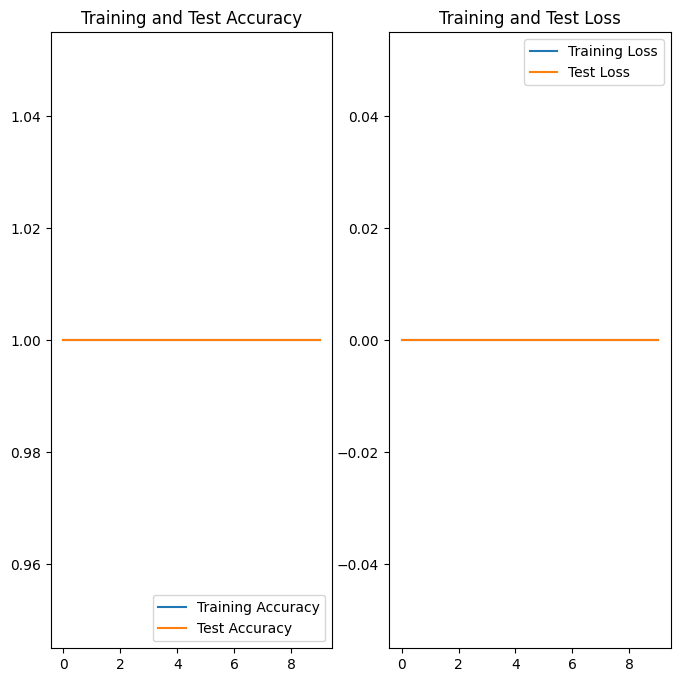

In [163]:
# acc = history.history['accuracy']
# test_acc = history.history['val_accuracy']

# loss = history.history['loss']
# test_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

In [156]:
results = model.evaluate(test_ds,test_labels)
print("test loss, test acc:", results)

338/338 [==============================] - 0s 447us/step - loss: 0.0000e+00 - accuracy: 1.0000
test loss, test acc: [0.0, 1.0]
